## Foundations of Data Science: Prediction and Machine Learning

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 3: Correlation

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (6.0, 6.0)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

### Visualization

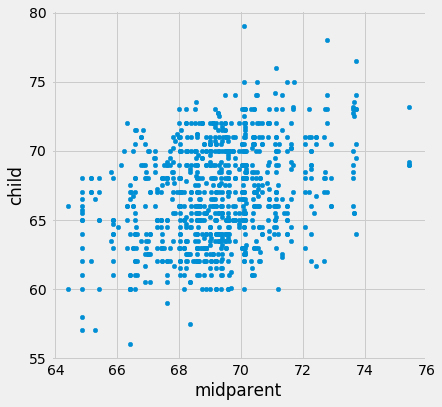

In [45]:
galton = pd.read_csv('data/galton.csv')
heights = galton.loc[:, ['midparentHeight', 'childHeight']]
heights.rename({'midparentHeight':'midparent', 'childHeight':'child'}, axis=1,
              inplace=True)
heights.plot.scatter('midparent', 'child')
plt.show()

In [46]:
hybrid = pd.read_csv('data/hybrid.csv')
hybrid

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,"24,509.74",7.46,41.26,Compact
1,Tino,2000,"35,354.97",8.20,54.10,Compact
2,Prius (2nd Gen),2000,"26,832.25",7.97,45.23,Compact
3,Insight,2000,"18,936.41",9.52,53.00,Two Seater
...,...,...,...,...,...,...
149,Prius Plug-in,2013,"32,000.00",9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,"32,950.00",11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,"38,700.00",11.76,43.00,Midsize
152,Chevrolet Volt,2013,"39,145.00",11.11,37.00,Compact


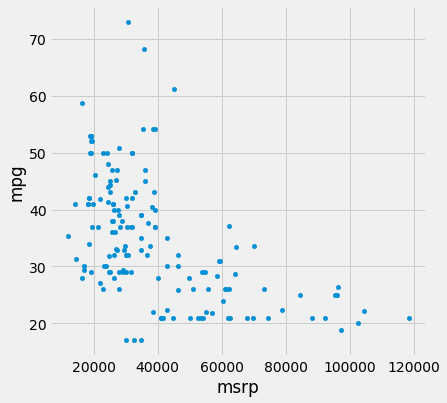

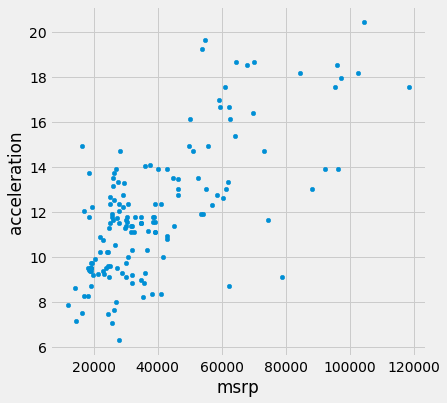

In [47]:
hybrid.plot.scatter('msrp', 'mpg')
hybrid.plot.scatter('msrp', 'acceleration')
plt.show()

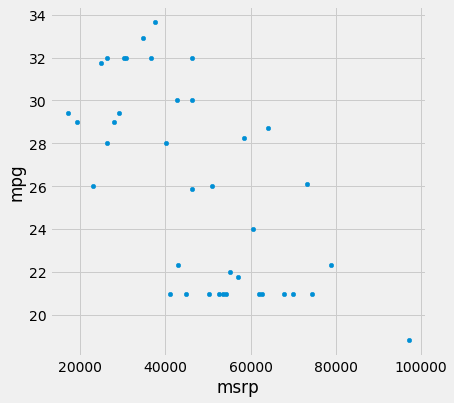

In [51]:
suv = hybrid.loc[hybrid['class'] == 'SUV']
suv.plot.scatter('msrp', 'mpg')
plt.show()

In [49]:
def std_units(nums):
    ''' convery array to standard units '''
    return ((nums - np.mean(nums)) / np.std(nums))

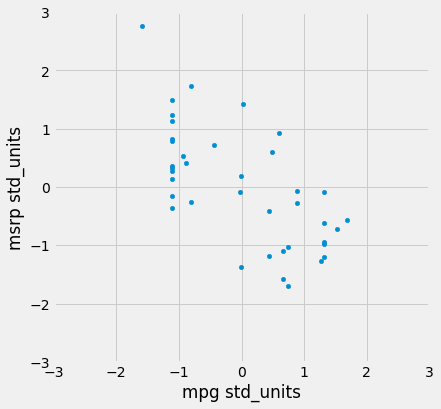

In [54]:
(pd.DataFrame({'msrp std_units': std_units(suv['msrp']),
              'mpg std_units': std_units(suv['mpg'])})
 .plot.scatter('mpg std_units', 'msrp std_units'))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### Calculation

Note: correlation uses standard units -> changing units will not affect calculation<br>
Note: x vs y and y vs x have the same correlation

In [65]:
def r_scatter(r):
    ''' Generates an example scatter plot with a correlation of approximately r 
    '''
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r * x + (np.sqrt(1 - r ** 2)) * z
    plt.scatter(x, y, color='darkblue', s=20)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

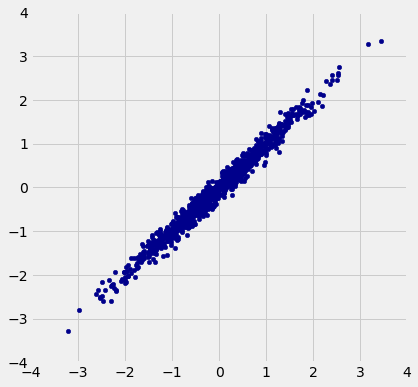

In [68]:
r_scatter(0.99)

In [73]:
example = pd.DataFrame({'x':np.arange(1, 7, 1),
                        'y':np.array([2, 3, 1, 5, 2, 7])})

r = np.mean(std_units(example['x']) * std_units(example['y']))
print(r)

example.corr()

0.6174163971897709


,x,y
x,1.00,0.62
y,0.62,1.00


### Interpretation

* Pearson correlation only reports on linear relationships
* Correlation does not equal causation
* Outliers have a strong effect on correlation
* Aggregated data may make correlations appear stronger than they would for all individuals 

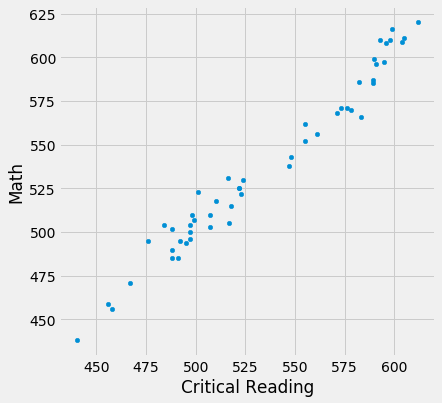

In [77]:
# Data aggregated by state averages
sat = pd.read_csv('data/sat2014.csv')
sat.plot.scatter('Critical Reading', 'Math')
plt.show()